In [1]:
import yfinance as yf
import pandas as pd 
import mplfinance as mpf

In [2]:
data = yf.download('spy',start='2019-01-01',end='2023-01-01')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,245.979996,251.210007,245.949997,250.179993,234.061615,126925200
2019-01-03,248.229996,248.570007,243.669998,244.210007,228.476288,144140700
2019-01-04,247.589996,253.110001,247.169998,252.389999,236.129227,142628800
2019-01-07,252.690002,255.949997,251.690002,254.380005,237.991028,103139100
2019-01-08,256.820007,257.309998,254.000000,256.769989,240.227051,102512600
...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,382.910004,59857300
2022-12-27,382.790009,383.149994,379.649994,381.399994,381.399994,51638200
2022-12-28,381.329987,383.390015,376.420013,376.660004,376.660004,70911500


In [3]:
data.head()
#data เขา parse_date มาแล้ว

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,245.979996,251.210007,245.949997,250.179993,234.061615,126925200
2019-01-03,248.229996,248.570007,243.669998,244.210007,228.476288,144140700
2019-01-04,247.589996,253.110001,247.169998,252.389999,236.129227,142628800
2019-01-07,252.690002,255.949997,251.690002,254.380005,237.991028,103139100
2019-01-08,256.820007,257.309998,254.000000,256.769989,240.227051,102512600


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,379.649994,383.059998,378.029999,382.910004,382.910004,59857300
2022-12-27,382.790009,383.149994,379.649994,381.399994,381.399994,51638200
2022-12-28,381.329987,383.390015,376.420013,376.660004,376.660004,70911500
2022-12-29,379.630005,384.350006,379.079987,383.440002,383.440002,66970900
2022-12-30,380.640015,382.579987,378.429993,382.429993,382.429993,83975100


In [5]:
#ก่อนจะทำ data ให้ copy ออกมาไว้อีกตัวก่อนดีกว่าเผื่ออะไรผิดพลาดได้ไม่ต่อง รmpeoeryไหม่
df = data.copy()

<AxesSubplot: xlabel='Date'>

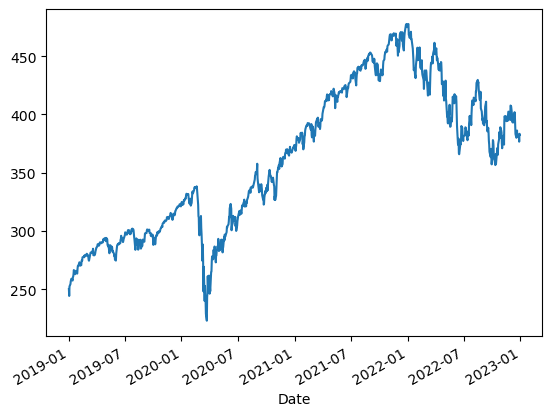

In [6]:
df['Close'].plot()

<AxesSubplot: xlabel='Date'>

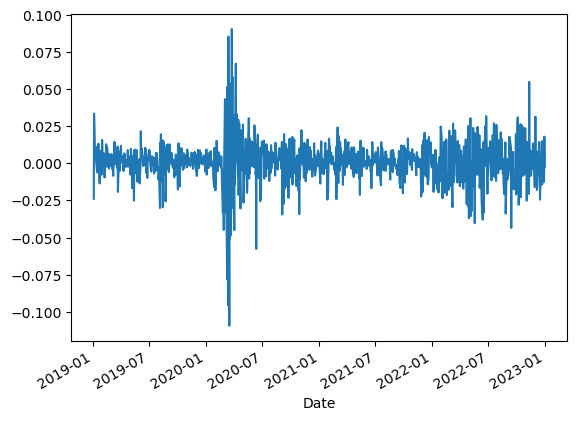

In [7]:
#make a daily return 
df['Close'].pct_change().plot() 

<AxesSubplot: xlabel='Date'>

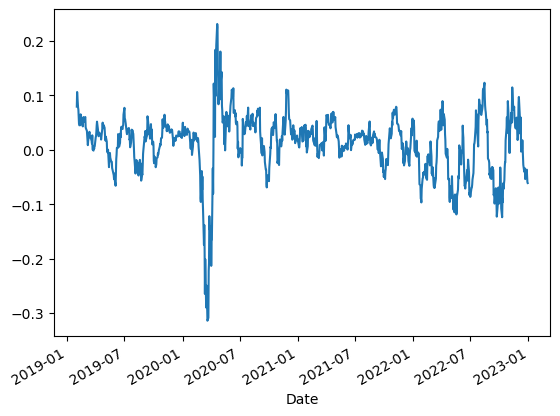

In [8]:
#monthly return    (trading day= 20)
df['Close'].pct_change(20).plot()

<AxesSubplot: xlabel='Date'>

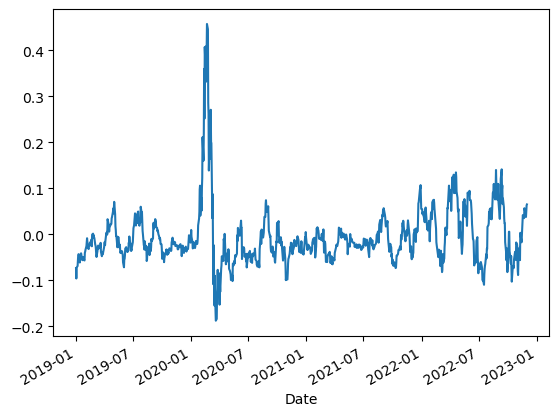

In [10]:
#เอาข้อมูล 20 วันข้างหน้า หารราคาวันนี้
df['Close'].pct_change(-20).plot()

In [12]:
test = df['Close'].pct_change(20)
test2= df['Close'].pct_change(-20)

In [13]:
test

Date
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2022-12-23   -0.048269
2022-12-27   -0.036650
2022-12-28   -0.046985
2022-12-29   -0.059458
2022-12-30   -0.061245
Name: Close, Length: 1008, dtype: float64

In [14]:
test2

Date
2019-01-02   -0.073167
2019-01-03   -0.095719
2019-01-04   -0.071959
2019-01-07   -0.068546
2019-01-08   -0.058554
                ...   
2022-12-23         NaN
2022-12-27         NaN
2022-12-28         NaN
2022-12-29         NaN
2022-12-30         NaN
Name: Close, Length: 1008, dtype: float64

#df['Close'].pct_change(-20)
#คล้ายๆเอาผลตอบแทนเฉลี่ย 20วันข้างหน้ามาใส่ช่องปัจจุบัน
#ทำไปเพื่อเวลาจะเอา data ใส่ modle


In [15]:
#คำสั่ง .shift()
#จะเลื่อนข้อมูลไปข้างล่าง
test2.shift(1)

Date
2019-01-02         NaN
2019-01-03   -0.073167
2019-01-04   -0.095719
2019-01-07   -0.071959
2019-01-08   -0.068546
                ...   
2022-12-23         NaN
2022-12-27         NaN
2022-12-28         NaN
2022-12-29         NaN
2022-12-30         NaN
Name: Close, Length: 1008, dtype: float64

In [16]:
test2

Date
2019-01-02   -0.073167
2019-01-03   -0.095719
2019-01-04   -0.071959
2019-01-07   -0.068546
2019-01-08   -0.058554
                ...   
2022-12-23         NaN
2022-12-27         NaN
2022-12-28         NaN
2022-12-29         NaN
2022-12-30         NaN
Name: Close, Length: 1008, dtype: float64

In [17]:
test2.shift(3)

Date
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07   -0.073167
2019-01-08   -0.095719
                ...   
2022-12-23         NaN
2022-12-27         NaN
2022-12-28         NaN
2022-12-29         NaN
2022-12-30         NaN
Name: Close, Length: 1008, dtype: float64

In [19]:
test2.dtypes

dtype('float64')

In [20]:
type(test2)

pandas.core.series.Series

In [22]:
#เราควรเช็ค type เสมอ งานเราควรคงรูปแบบ dataframe ไว้
type(df)

pandas.core.frame.DataFrame

In [26]:
df['hello blank'] = df.Close.shift(-1)#เลื่อนข้อมูลขึ้นไป 1
df
#การshift(-1) คือเราจะต้อง action ที่ open price  มักใช้กับพวกข้อมูลที่ไม่มีเปิดกระโดด

,Open,High,Low,Close,Adj Close,Volume,hello blank
Date,,,,,,,
2019-01-02,245.979996,251.210007,245.949997,250.179993,234.061615,126925200,244.210007
2019-01-03,248.229996,248.570007,243.669998,244.210007,228.476288,144140700,252.389999
2019-01-04,247.589996,253.110001,247.169998,252.389999,236.129227,142628800,254.380005
2019-01-07,252.690002,255.949997,251.690002,254.380005,237.991028,103139100,256.769989
2019-01-08,256.820007,257.309998,254.000000,256.769989,240.227051,102512600,257.970001
...,...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,382.910004,59857300,381.399994
2022-12-27,382.790009,383.149994,379.649994,381.399994,381.399994,51638200,376.660004
2022-12-28,381.329987,383.390015,376.420013,376.660004,376.660004,70911500,383.440002


In [31]:
#เวลา data เริ่มเละเราจะ รีง่่ายด้วย
df = data.copy()

In [32]:
df['next_20_days_return'] = df['Close'].pct_change(-20)

In [34]:
df
#สิ่งที่ทำนี้คือ ลองจินนะการว่า เรากำลังใช้ open high low close adjclose vol มาทำการอะไรสักอย่างกันแล้วให้ผลลัพธ์ออกมาเป็น
#next 20 days return  โดยอารมเหมือน r = ax + by + cz เราให้คอมหาสัมประสิทธิ์ a b cที่มาคุณ x y z แล้วจะทำให้เกิด r
# ซึ่งในเราจริงๆเราใช้ทั้งหมด open high low close หรอกเราอาจใช้แค่ close +อื่นๆ

,Open,High,Low,Close,Adj Close,Volume,next_20_days_return
Date,,,,,,,
2019-01-02,245.979996,251.210007,245.949997,250.179993,234.061615,126925200,-0.073167
2019-01-03,248.229996,248.570007,243.669998,244.210007,228.476288,144140700,-0.095719
2019-01-04,247.589996,253.110001,247.169998,252.389999,236.129227,142628800,-0.071959
2019-01-07,252.690002,255.949997,251.690002,254.380005,237.991028,103139100,-0.068546
2019-01-08,256.820007,257.309998,254.000000,256.769989,240.227051,102512600,-0.058554
...,...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,382.910004,59857300,NaN
2022-12-27,382.790009,383.149994,379.649994,381.399994,381.399994,51638200,NaN
2022-12-28,381.329987,383.390015,376.420013,376.660004,376.660004,70911500,NaN


In [35]:
x = df[['Close','Volume']]
x

,Close,Volume
Date,,
2019-01-02,250.179993,126925200
2019-01-03,244.210007,144140700
2019-01-04,252.389999,142628800
2019-01-07,254.380005,103139100
2019-01-08,256.769989,102512600
...,...,...
2022-12-23,382.910004,59857300
2022-12-27,381.399994,51638200
2022-12-28,376.660004,70911500


In [36]:
y = df['next_20_days_return']
y

Date
2019-01-02   -0.073167
2019-01-03   -0.095719
2019-01-04   -0.071959
2019-01-07   -0.068546
2019-01-08   -0.058554
                ...   
2022-12-23         NaN
2022-12-27         NaN
2022-12-28         NaN
2022-12-29         NaN
2022-12-30         NaN
Name: next_20_days_return, Length: 1008, dtype: float64

In [37]:
for_model = x.join(y)
for_model

,Close,Volume,next_20_days_return
Date,,,
2019-01-02,250.179993,126925200,-0.073167
2019-01-03,244.210007,144140700,-0.095719
2019-01-04,252.389999,142628800,-0.071959
2019-01-07,254.380005,103139100,-0.068546
2019-01-08,256.769989,102512600,-0.058554
...,...,...,...
2022-12-23,382.910004,59857300,NaN
2022-12-27,381.399994,51638200,NaN
2022-12-28,376.660004,70911500,NaN


In [38]:
#ข้องมูลที่ได้มาเราอาจจะรู้สึว่ายังมองยากอยู่ 
#ก็ลองทำเป็น % อย่างน้อยจะได้ดูง่ายๆว่าเพิ่มขึ้นลดลงเท่าไหร่
for_model = x.pct_change().join(y)
for_model

,Close,Volume,next_20_days_return
Date,,,
2019-01-02,NaN,NaN,-0.073167
2019-01-03,-0.023863,0.135635,-0.095719
2019-01-04,0.033496,-0.010489,-0.071959
2019-01-07,0.007885,-0.276870,-0.068546
2019-01-08,0.009395,-0.006074,-0.058554
...,...,...,...
2022-12-23,0.005752,-0.402150,NaN
2022-12-27,-0.003944,-0.137312,NaN
2022-12-28,-0.012428,0.373237,NaN


add more data

In [39]:
import pandas_ta as ta

In [43]:
df.ta.sma(length=5,append=True)

Date
2019-01-02           NaN
2019-01-03           NaN
2019-01-04           NaN
2019-01-07           NaN
2019-01-08    251.585999
                 ...    
2022-12-23    382.084003
2022-12-27    382.360004
2022-12-28    381.584003
2022-12-29    381.026001
2022-12-30    381.367999
Name: SMA_5, Length: 1008, dtype: float64

In [44]:
df

,Open,High,Low,Close,Adj Close,Volume,next_20_days_return,SMA_5
Date,,,,,,,,
2019-01-02,245.979996,251.210007,245.949997,250.179993,234.061615,126925200,-0.073167,NaN
2019-01-03,248.229996,248.570007,243.669998,244.210007,228.476288,144140700,-0.095719,NaN
2019-01-04,247.589996,253.110001,247.169998,252.389999,236.129227,142628800,-0.071959,NaN
2019-01-07,252.690002,255.949997,251.690002,254.380005,237.991028,103139100,-0.068546,NaN
2019-01-08,256.820007,257.309998,254.000000,256.769989,240.227051,102512600,-0.058554,251.585999
...,...,...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,382.910004,59857300,NaN,382.084003
2022-12-27,382.790009,383.149994,379.649994,381.399994,381.399994,51638200,NaN,382.360004
2022-12-28,381.329987,383.390015,376.420013,376.660004,376.660004,70911500,NaN,381.584003


In [48]:
#ลองคำนวนมือเทียบว่าตรงกันไหม?
df['manual sma'] = df.Close.rolling(window=5).mean()

#ที่ต้องคำนวณเป็นเพราะ pandas_ta มันจะรับแค่ dataframe และจะมุ่งไปที่ close 
#บางกรณีที่เราต้องการ ทำอื่นๆ กับ volume งี้เราอาจต้องทำด้วยมือหรืไปก็ไปหลอกมันด้วยเปลีย่นชื่อ col เป็น close

In [47]:
df

,Open,High,Low,Close,Adj Close,Volume,next_20_days_return,SMA_5,manual sma
Date,,,,,,,,,
2019-01-02,245.979996,251.210007,245.949997,250.179993,234.061615,126925200,-0.073167,NaN,NaN
2019-01-03,248.229996,248.570007,243.669998,244.210007,228.476288,144140700,-0.095719,NaN,NaN
2019-01-04,247.589996,253.110001,247.169998,252.389999,236.129227,142628800,-0.071959,NaN,NaN
2019-01-07,252.690002,255.949997,251.690002,254.380005,237.991028,103139100,-0.068546,NaN,NaN
2019-01-08,256.820007,257.309998,254.000000,256.769989,240.227051,102512600,-0.058554,251.585999,251.585999
...,...,...,...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,382.910004,59857300,NaN,382.084003,382.084003
2022-12-27,382.790009,383.149994,379.649994,381.399994,381.399994,51638200,NaN,382.360004,382.360004
2022-12-28,381.329987,383.390015,376.420013,376.660004,376.660004,70911500,NaN,381.584003,381.584003


In [49]:
x

,Close,Volume
Date,,
2019-01-02,250.179993,126925200
2019-01-03,244.210007,144140700
2019-01-04,252.389999,142628800
2019-01-07,254.380005,103139100
2019-01-08,256.769989,102512600
...,...,...
2022-12-23,382.910004,59857300
2022-12-27,381.399994,51638200
2022-12-28,376.660004,70911500


In [50]:
x.ta.macd(append=True)

C:\Users\Nattapol\AppData\Local\Temp\ipykernel_13496\1969942300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.ta.macd(append=True)
C:\Users\Nattapol\AppData\Local\Temp\ipykernel_13496\1969942300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.ta.macd(append=True)
C:\Users\Nattapol\AppData\Local\Temp\ipykernel_13496\1969942300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN
...,...,...,...
2022-12-23,-2.469546,-2.264161,-0.205385
2022-12-27,-2.791225,-2.068672,-0.722553
2022-12-28,-3.389563,-2.133608,-1.255955


In [52]:
x.ta.rsi(length=14,append=True)
x

C:\Users\Nattapol\AppData\Local\Temp\ipykernel_13496\3779448972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.ta.rsi(length=14,append=True)


,Close,Volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14
Date,,,,,,
2019-01-02,250.179993,126925200,NaN,NaN,NaN,NaN
2019-01-03,244.210007,144140700,NaN,NaN,NaN,NaN
2019-01-04,252.389999,142628800,NaN,NaN,NaN,NaN
2019-01-07,254.380005,103139100,NaN,NaN,NaN,NaN
2019-01-08,256.769989,102512600,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-12-23,382.910004,59857300,-2.469546,-2.264161,-0.205385,43.304807
2022-12-27,381.399994,51638200,-2.791225,-2.068672,-0.722553,42.136131
2022-12-28,376.660004,70911500,-3.389563,-2.133608,-1.255955,38.613407


In [53]:
#กำหนด condition ต่างๆ
x.loc[x.MACD_12_26_9 > 0,'macd_cross_over'] = 1
x.loc[x.MACD_12_26_9 < 0,'macd_cross_over'] = -1
x[x['macd_cross_over'].notnull()] #ทำให้ไม่มีช่องว่าง

C:\Users\Nattapol\AppData\Local\Temp\ipykernel_13496\588828551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[x.MACD_12_26_9 > 0,'macd_cross_over'] = 1


,Close,Volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,macd_cross_over
Date,,,,,,,
2019-02-07,270.140015,95482000,5.858611,NaN,NaN,66.681925,1.0
2019-02-08,270.470001,75788900,5.607827,NaN,NaN,67.221338,1.0
2019-02-11,270.619995,68021400,5.359403,NaN,NaN,67.479069,1.0
2019-02-12,274.100006,72270200,5.381301,NaN,NaN,72.818967,1.0
2019-02-13,274.989990,65277200,5.408128,NaN,NaN,73.994984,1.0
...,...,...,...,...,...,...,...
2022-12-23,382.910004,59857300,-2.469546,-2.264161,-0.205385,43.304807,-1.0
2022-12-27,381.399994,51638200,-2.791225,-2.068672,-0.722553,42.136131,-1.0
2022-12-28,376.660004,70911500,-3.389563,-2.133608,-1.255955,38.613407,-1.0
